# Data Visualization

A function that takes as input a data frame, vector, or matrix, and produces a figure is considered **data visualization**. The goal of visualizing a dataset is to quickly understand one to two aspects of how variables are distributed, how the values of two or more variables are associated with one another, and more generally to understand one aspect of the data you collected. 

We will explore (i) data types and (ii) building the three foundational data visualizations: a histogram, boxplot, scatterplot.

## Importance of data visualization

Visualizing data is a great way to understand trends in your data. But misleading data visualizations can make it easy to come to wrong conclusions. 

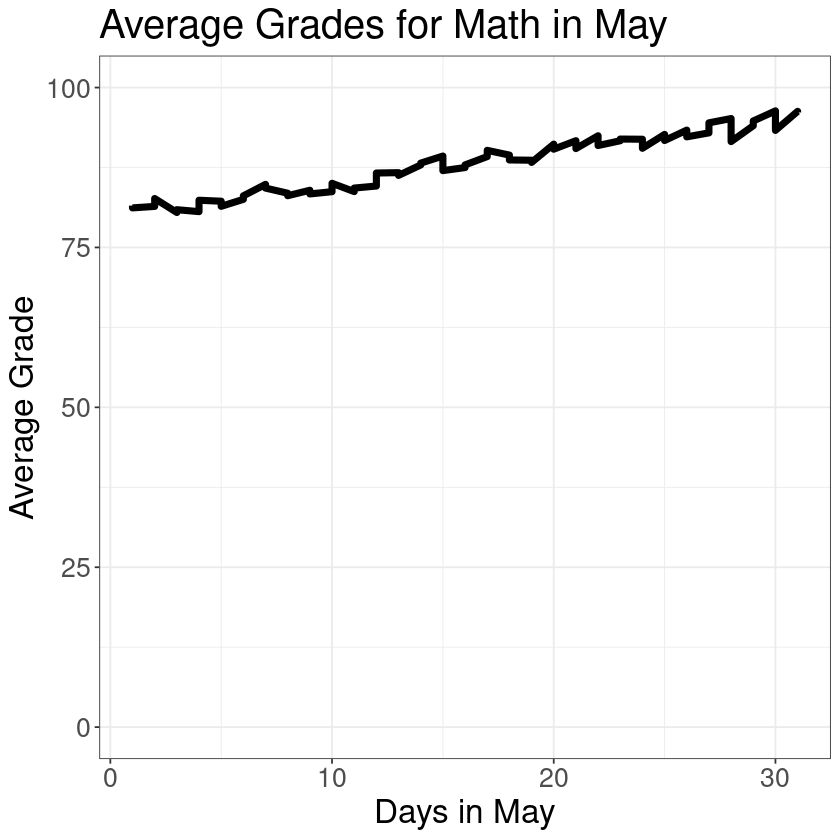

In [33]:
## dont worry about how this code works
d = expand.grid(days = 1:31, class = c('First', 'Second'))
d$grade = .8 + d$days*.005 + rnorm(nrow(d), 0, .01)

ggplot(d, aes(days, grade*100)) + 
geom_line(size = 2) + 
ylim(0, 100) + 
labs(
    x = 'Days in May',
    y = 'Average Grade',
    title = 'Average Grades for Math in May'
) + 
theme_bw() + 
theme(text = element_text(size = 20))

What might you conclude based on the above plot?

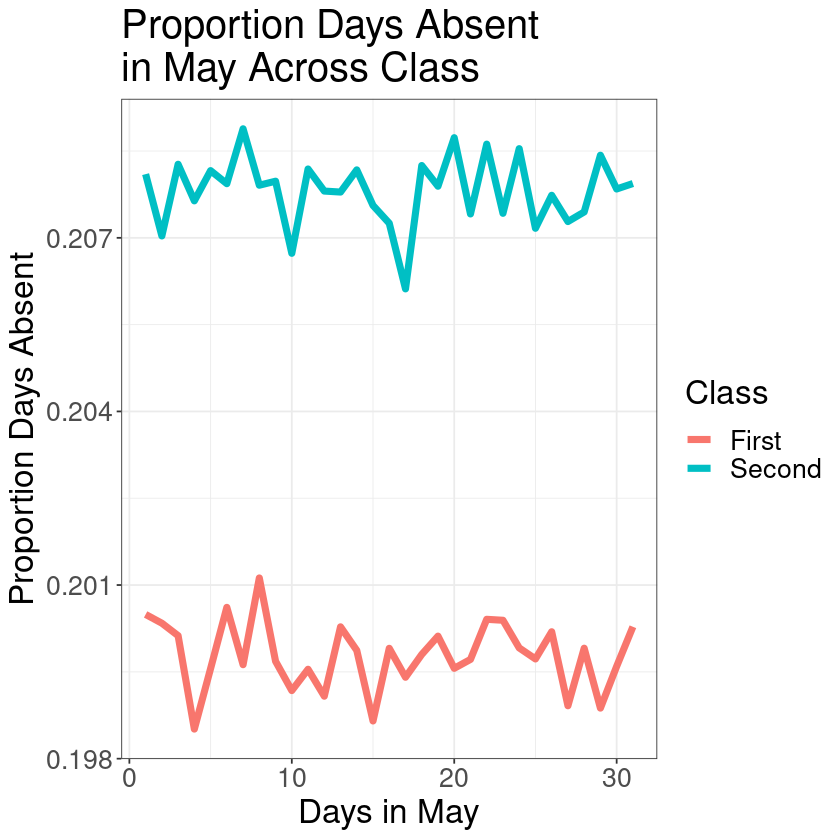

In [52]:
## dont worry about how this code works
d$class_dummy <- ifelse(d$class == 'First', 0, 1)
d$prop_absent <- .2 + d$class_dummy*.008 + rnorm(nrow(d), 0, .0006)

ggplot(d, aes(days, prop_absent)) + 
geom_line(aes(color = class), size = 2) + 
labs(
    x = 'Days in May',
    y = 'Proportion Days Absent',
    title = 'Proportion Days Absent \nin May Across Class',
    color = 'Class'
) + 
#ylim(0,1) +
theme_bw() + 
theme(text = element_text(size = 20))

What might you conclude based on the above plot? This is an example of a misleading visualization. Can you tell why?

## Data types

Consider a single vector $v$ located inside a data frame $\mathcal{D}$. 
The **data type** for this vector $v$ depends on how two values in this vector, say $v_{1}$ and $v_{2}$, can be compared to one another, 

### Nominal data

Nominal data, often called categorical data, contains a set of categories that cannot be compared to one another numeircally. That is, for two nominal values $v_{1}$ and $v_{2}$ we cannot place between them a less than, less than or equal to, greater than, greater than or equal to, or an equal. 

For example, the primary colors are nominal data. They cannot be ranked, they cannot be compared.

### Ordinal data

Ordinal data contains a set of values that can be ranked, however there is not a notation of distance between two values. For example, for two ordinal values values $v_{1}$ and $v_{2}$ we can place between them a less than, less than or equal to, greater than, greater than or equal to, or an equal symbol, but the quantity $v_{2}$ - $v_{1}$ has little meaning.

An example the CDC gives is stages of cancer. The stages of cancer can be ranked but the severity between them may not be informative. 

### Interval data

Two values that are considered interval data if they can be compared to one another and there is a natural notion of distance between the two.  

For example, age computed as the number of years from one's date of birth to today is interval data. We can make a statement like "patient one is X years older than patient two".


### Ratio-scale data 

Data is considered to be on a ratio-scale if (i) the data is interval type and (ii) there is a natural zero for this data that indiciates the complete absence of some quantity. 
For example, number of virus particles in a patient.

## Introducing ggplot

Code developers have created many different frameworks or libraries for data visualization. ggplot is the most popular of these libraries in R, and it is among the most popular across different programming languages.

<img src='visualization_libraries.png' height='50%' width='50%'>

ggplot works by layering different aspects of a plot together to create a whole plot. For this reason, it can be a bit trickier than other data visualization frameworks, but its layering is also what makes it a powerful visualization tool.

### Loading in ggplot
Last week we looked at how to load in a package or library of functions that are external to the base functions available in R. ggplot works similarly in that it is external to R and we need to load it in first using either the `library` or `require` functions.

In [1]:
library(ggplot2)

### Loading in the data
For our example we will use a German Health Study, conducted in 1998, that asked patients for three pieces of information: (i) The number of visits they made to a physician in the year 1998, whether the patient reported at the time of the survey if they are in bad health, and their age at the time of survey. 

In [2]:
d = read.csv('badhealth.csv')
d$badh = factor(d$badh)
head(d)
summary(d)

,X,numvisit,badh,age
,<int>,<int>,<fct>,<int>
1,1,30,0,58
2,2,20,0,54
3,3,16,0,44
4,4,20,0,57
5,5,15,0,33
6,6,15,0,28


       X             numvisit      badh          age       
 Min.   :   1.0   Min.   : 0.000   0:1015   Min.   :20.00  
 1st Qu.: 282.5   1st Qu.: 0.000   1: 112   1st Qu.:28.00  
 Median : 564.0   Median : 1.000            Median :35.00  
 Mean   : 564.0   Mean   : 2.353            Mean   :37.23  
 3rd Qu.: 845.5   3rd Qu.: 3.000            3rd Qu.:46.00  
 Max.   :1127.0   Max.   :40.000            Max.   :60.00  

**Question for reflection:**  
For the variables `numvisit`, `badh`, and `age`, what *types* of data are each of these variables

## Understanding ggplot geometry

As mentioned above, ggplot builds up a plot in layers. We always start with a base layer, where we define the data we want to use and what the axes of the plot are going to be.

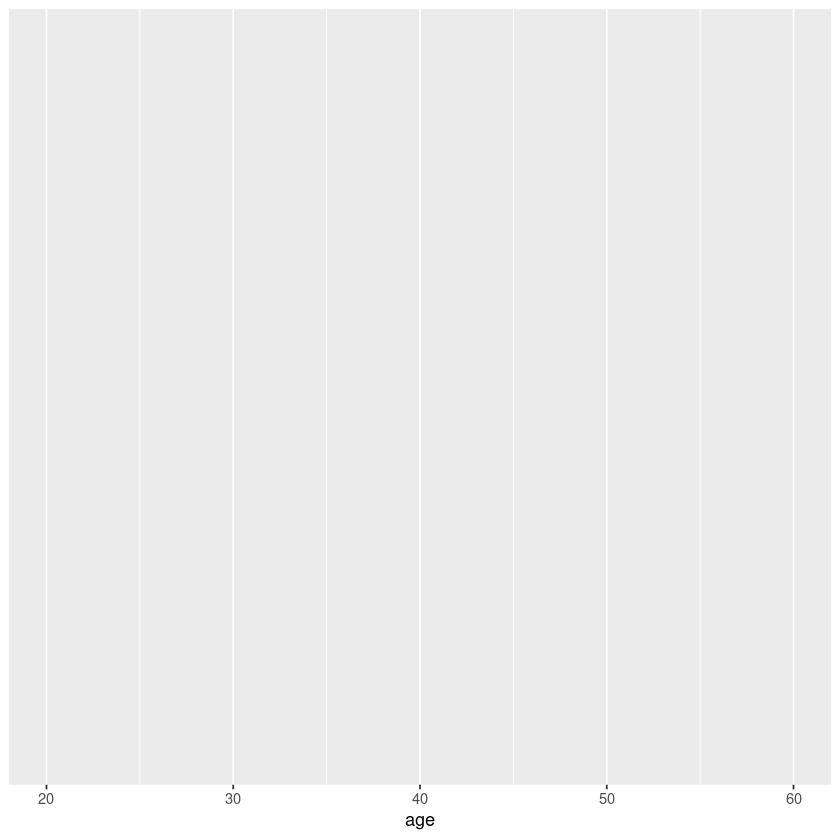

In [3]:
ggplot(data = d, aes(x = age))

You can see that the line above just created an empty space. This is our first layer (ie, base layer). To create the rest of the plot, we'll be adding more layers to this. Each layer gets tacked on with the `+` operator.  

`aes()` is an important function in the ggplot language. aes stands for *aesthetic mapping*- it controls the way in which variables in your data are mapped to different elements in the plot. Today we'll pretty much only be using this function to specify which axis should correspond to which variable.

*Important to note:* notice how in the line of code above, we can refer to the variable age with just the word `age`, we don't need to refer to the column in ways we've learned in previous classes, such as like `d[,'age']` or `d$age`. This is because we've told ggplot what data we're using with the `data=` argument, and by just supplying the name corresponding to a column, it knows what we're talking about and can handle it appropriately.  

**Data layers**  
Each type of plot (eg, barplot, scatterplot, histogram) is its own layer that we can add on to a base layer separately. The syntax for each of the following is:  

* `geom_bar()`  
* `geom_point()`  
* `geom_histogram()`

### Histogram
A histogram is a useful plot when we want to see the frequencies across different levels of one variable. For example, we have an `age` column in our data set, and we can use a histogram to see how many people of each age are represented in our data.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



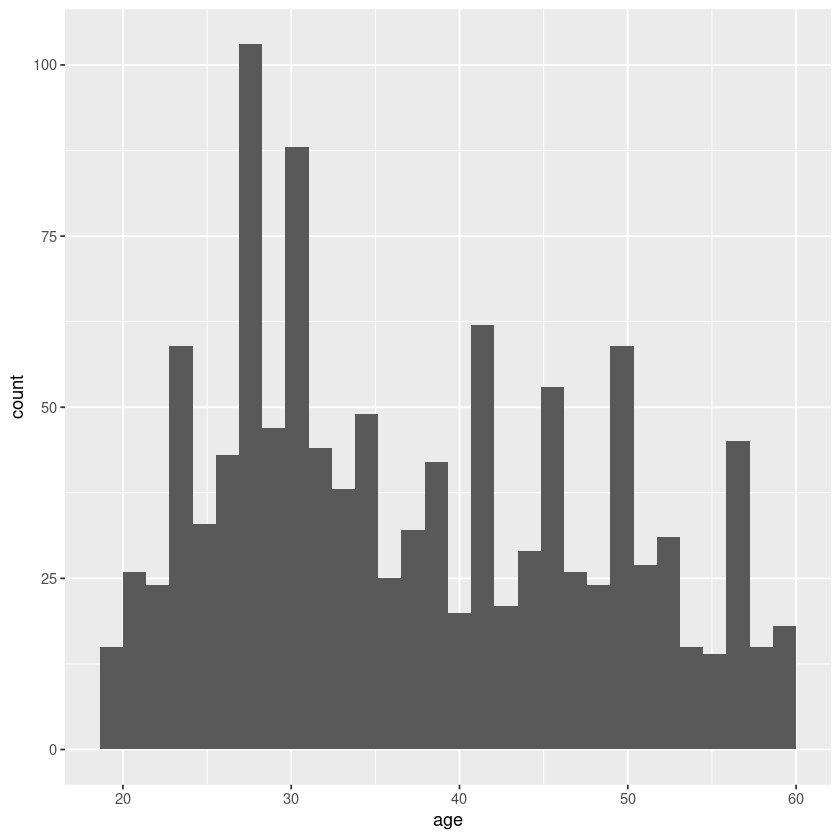

In [4]:
ggplot(data = d, aes(x = age)) + 
geom_histogram()

**Question for reflection:** What can you tell about our data from looking at this plot?  

Notice we didn't give any arguments to `geom_histogram()`, and we get a warning message saying it's trying to guess how many "bins" to use. Bin number is a parameter (or argument) of the histogram. We can get more specific in how we define the histogram by defining how many bins the plot should use.

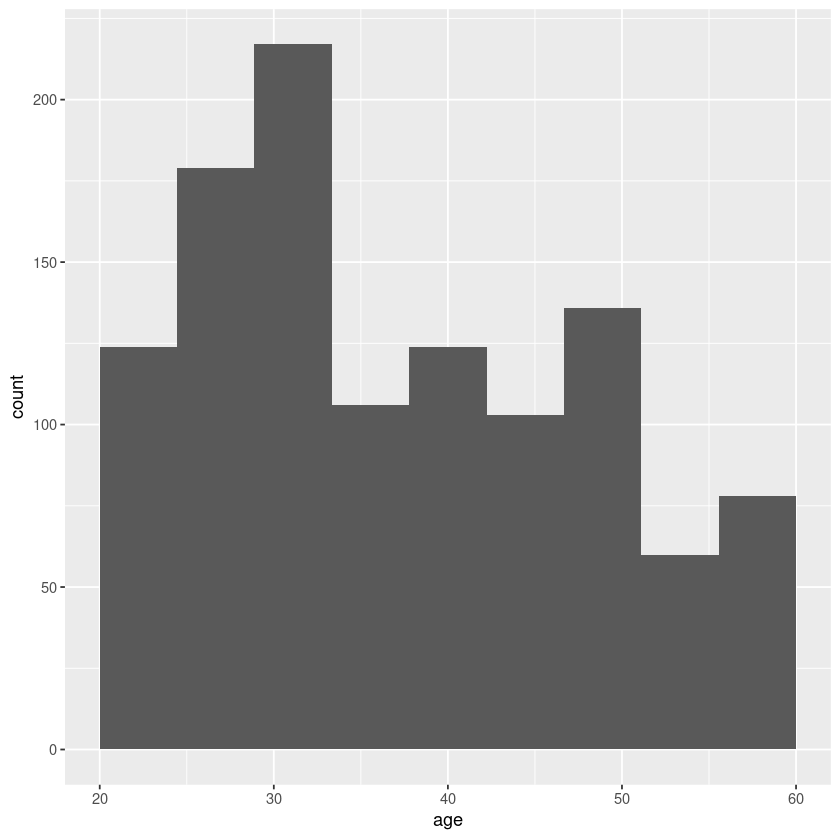

In [5]:
ggplot(data = d, aes(x = age)) + 
geom_histogram(bins = 10)

**Question for reflection:** Based on the difference between these two plots, can you guess what the `bins=` argument controls?

### Bar plot
A bar plot is a common way to view some aspect of the data broken down by categories. As such, you will often want to use an ordinal or nominal variable on the x axis, and plot some summary of these on the y axis.

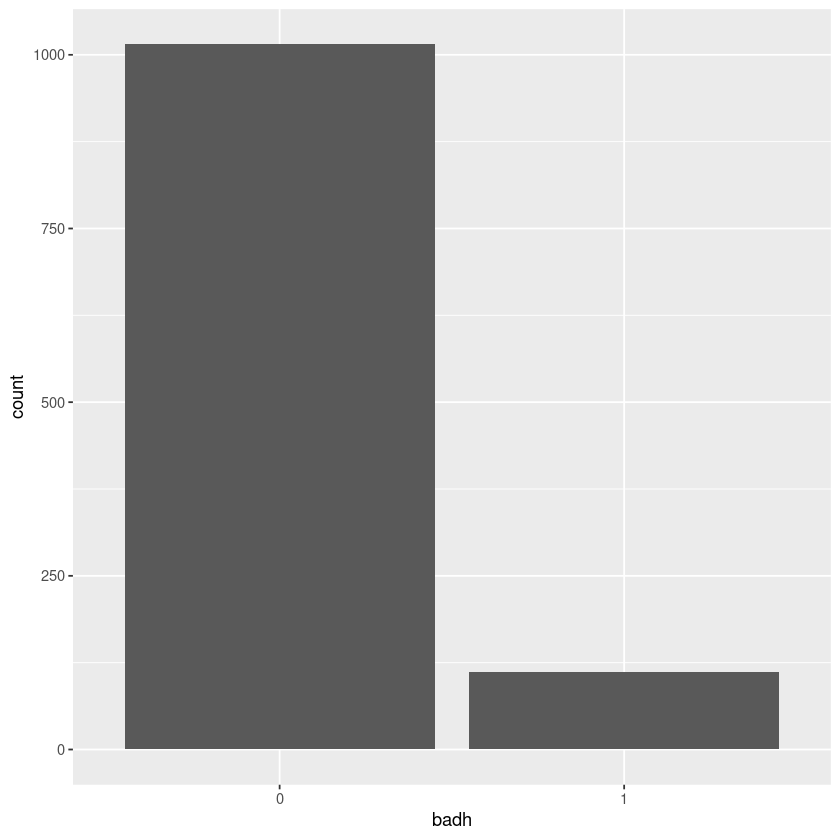

In [6]:
ggplot(data = d, aes(x = badh)) + 
geom_bar()

Notice in the last two examples, we only specified an x-axis variable and not a y-axis variable in the `aes` function (i.e., `aes(x=badh)`)---but we see a y-axis on the plots. For some plots, such as bar plots, if you don't specify the y-axis, ggplot will automatically assume what kind of summary you want on the y-axis. Here, ggplot counts the number of observations across the two categories and plots these counts on the y-axis.

### Scatterplot

Let's see a case where we *do* define a y-axis. A scatter plot is a great way of visualizing the relationship between two integer or ratio/scale variables. We can look at the relationship between `age` and `numvisit` in our data.

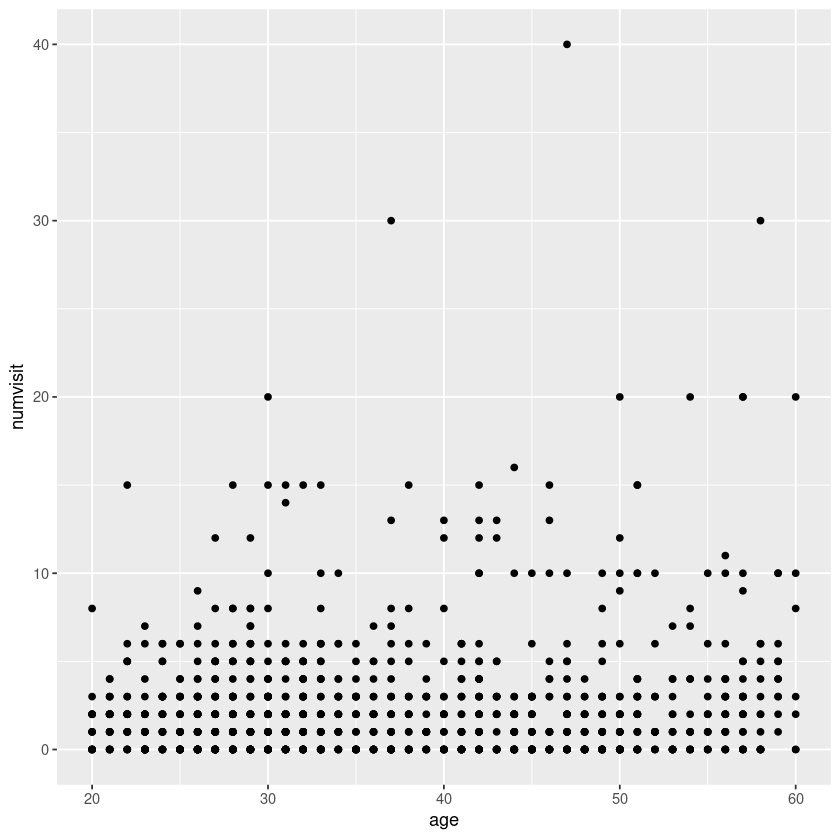

In [7]:
ggplot(data = d, aes(x = age, y = numvisit)) + 
geom_point()

### Box plots
One final type of plot we'll introduce today is the boxplot (`geom_boxplot`). Box plots are similar to barplots but add in some extra summaries of the data.

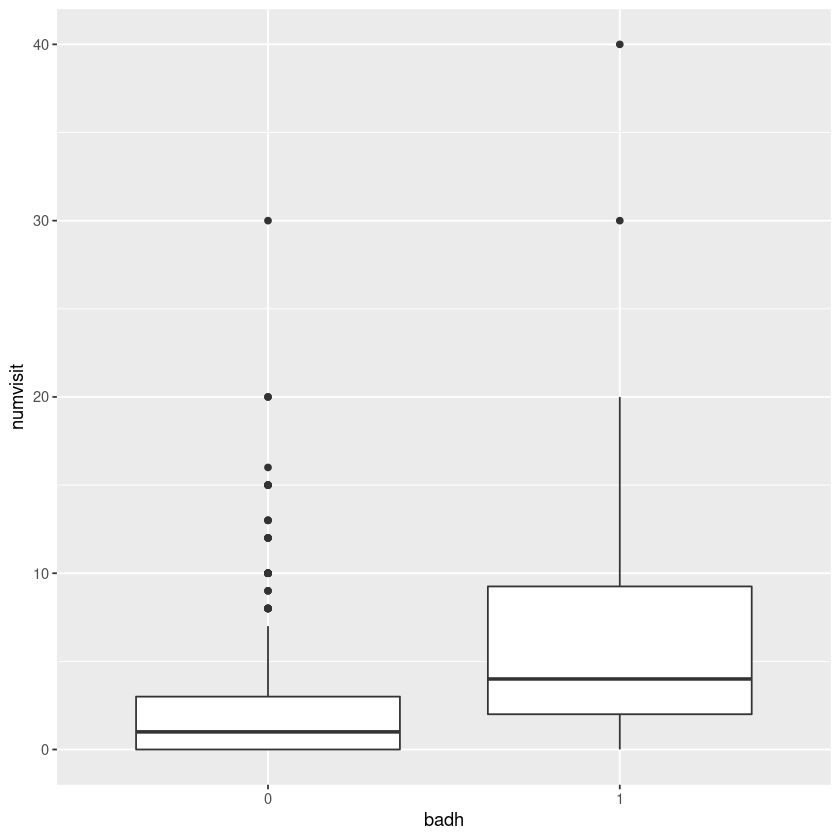

In [8]:
ggplot(data = d, aes(x = badh, y = numvisit)) + 
geom_boxplot()

### Putting it together with what we learned last week
Remember last week we learned how to compute a summary of one variable across groups of another variable. For example, if I want to summarize the average of `numvisit` across groups of `badh`, I first create a function that summarizes a mean, then use `ddply` from the `plyr` package to compute the summary, like so:

In [12]:
library(plyr)
my_mean = function(data) {
    m = mean(data$numvisit)
    return(data.frame('average_numvisit' = m))
}
ddply(d, .(badh), my_mean)

badh,average_numvisit
<fct>,<dbl>
0,1.937931
1,6.116071


So we want a bar plot where the x axis is the two levels of `badh`, and the y-axis are the two averages of `numvisit` across those levels. ggplot has a convenient built in way of doing this for bar plots using the following syntax.

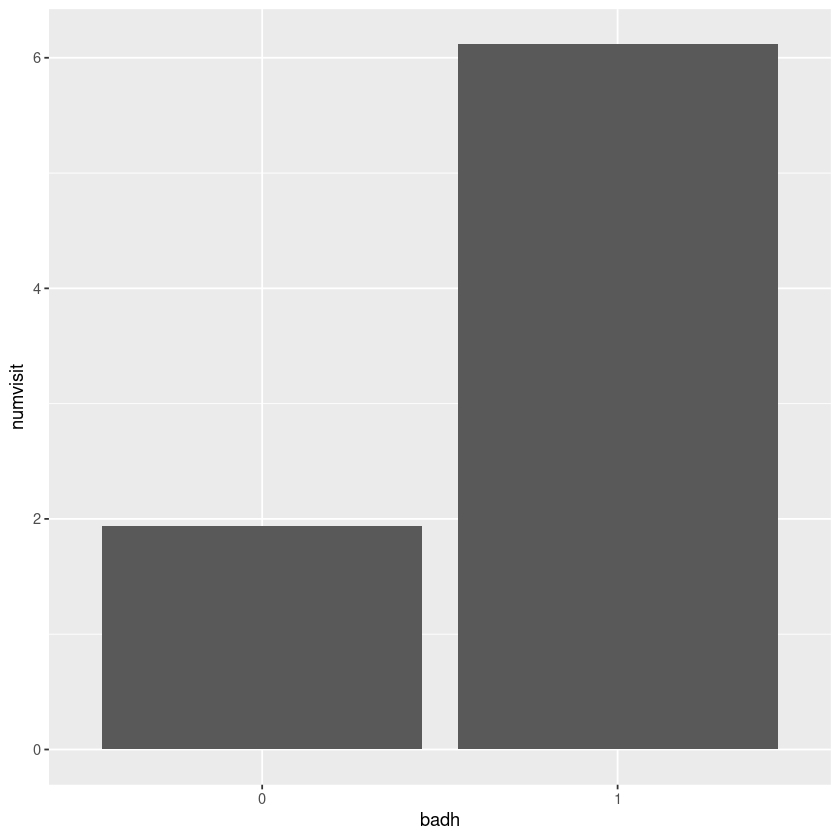

In [10]:
ggplot(data = d, aes(x = badh, y = numvisit)) + 
geom_bar(stat='summary', fun = 'mean')

Notice first that now we are specifying a y-axis variable inside the `aes()` function. In the `bar_plot()` function, the argument `stat='summary'` tells ggplot that we want to summarize some aspect of the y-axis variable across levels of the x-axis variable, and the `fun='mean'` argument tells ggplot *how* to summarize. We know we got the right answer here because we can compare the height of the two bars against the means that we computed by hand above.

## Assignment

We will be working with data collected about possums. You can read more information about the dataset by going [here](http://math.furman.edu/~dcs/courses/math47/R/library/DAAG/html/possum.html) (note, this link just points to a description of the data, not the data itself). This dataset is stored in the same directory as this notebook and is called `possum.csv`.  

1. Read in the dataset .  
    * Copy / paste / and run this line of code: `d$age = factor(d$age)`, replacing the letter `d` with whatever variable name you assigned to the data.  
    * Display the first few rows of the data and compute a summary of all the variables.  
2. What data types are the following variables: `sex`, `age`, `earconch`, `skullw`, `hdlngth`.  
3. Plot a histogram of the `earconch` variable. What can you conclude about the distribution of this variable based on the histogram?  
4. Create a scatter plot between `skullw` and `hdlngth`. What can you observe about the relationship between these two variables.  
5. Create a bar plot displaying the counts of males and females in the data.  
6. Create a bar plot summarizing the median of `earconch` across levels of `sex`. Are there any noticeable differences between sexes in earconch size?